In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_path = "../results/baseline_backtest.csv"

df = pd.read_csv(file_path, parse_dates=["datetime"])
df.set_index("datetime", inplace=True)

df.head()


,open,high,low,close,volume,ema_5,ema_15,ema_gap,returns,volatility,...,minute,day_of_week,returns_lag_1,returns_lag_3,ema_gap_lag_1,regime,signal,position,strategy_returns,equity_curve
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-09 11:00:00,8285.75,8288.85,8282.30,8288.00,0,8285.789434,8286.208532,-0.419098,0.000278,0.000489,...,0,4,0.000127,0.000060,-1.268458,0,0,NaN,NaN,NaN
2015-01-09 11:05:00,8287.95,8288.10,8280.20,8281.55,0,8284.376289,8285.626216,-1.249927,-0.000778,0.000485,...,5,4,0.000278,0.000338,-0.419098,0,0,0.0,-0.0,1.0
2015-01-09 11:10:00,8281.85,8286.35,8279.90,8282.35,0,8283.700860,8285.216689,-1.515829,0.000097,0.000465,...,10,4,-0.000778,0.000127,-1.249927,0,0,0.0,0.0,1.0
2015-01-09 11:15:00,8282.55,8283.20,8276.15,8278.45,0,8281.950573,8284.370853,-2.420280,-0.000471,0.000457,...,15,4,0.000097,0.000278,-1.515829,-1,0,0.0,-0.0,1.0
2015-01-09 11:20:00,8278.55,8280.70,8266.55,8266.55,0,8276.817049,8282.143246,-5.326197,-0.001437,0.000549,...,20,4,-0.000471,-0.000778,-2.420280,-1,0,0.0,-0.0,1.0


In [5]:
df["trade_pnl"] = df["strategy_returns"]


In [7]:
mean_pnl = df["trade_pnl"].mean()
std_pnl = df["trade_pnl"].std()

df["z_score"] = (df["trade_pnl"] - mean_pnl) / std_pnl


In [9]:
outliers = df[df["z_score"].abs() > 3]
normal_trades = df[df["z_score"].abs() <= 3]

len(outliers), len(normal_trades)


(1886, 189485)

In [11]:
outlier_percentage = len(outliers) / len(df) * 100
outlier_percentage


0.9855151223794495

In [13]:
outliers["trade_pnl"].mean(), normal_trades["trade_pnl"].mean()


(4.752286459904343e-05, 4.379263157708853e-06)

In [15]:
outliers["regime"].value_counts(normalize=True)


regime
-1    0.483033
 1    0.480382
 0    0.036585
Name: proportion, dtype: float64

In [17]:
outliers["volatility"].mean(), normal_trades["volatility"].mean()


(0.002627975967026204, 0.000817158850822239)

In [19]:
outliers["hour"].value_counts().sort_index()


hour
9     1123
10     119
11      87
12      86
13     124
14     194
15     146
17       1
18       6
Name: count, dtype: int64

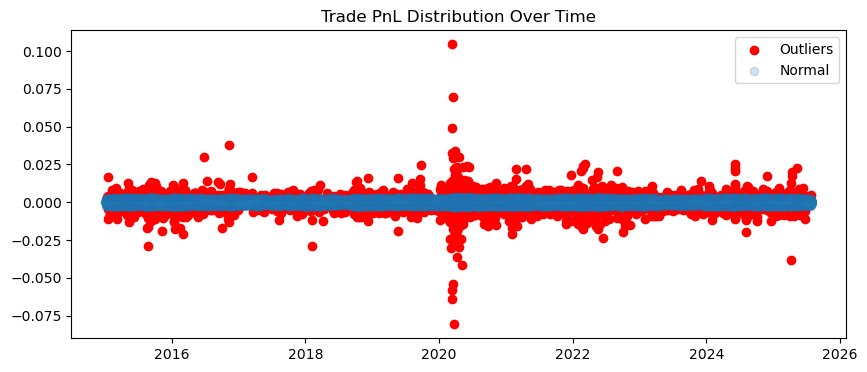

In [21]:
plt.figure(figsize=(10,4))
plt.scatter(outliers.index, outliers["trade_pnl"], label="Outliers", color="red")
plt.scatter(normal_trades.index, normal_trades["trade_pnl"], alpha=0.2, label="Normal")
plt.legend()
plt.title("Trade PnL Distribution Over Time")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_43156\2881504363.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


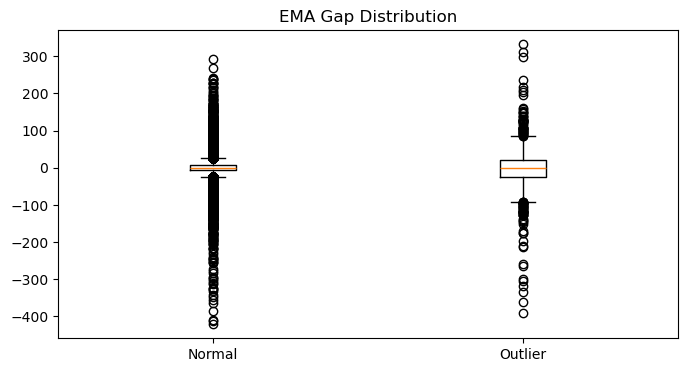

In [23]:
plt.figure(figsize=(8,4))
plt.boxplot(
    [normal_trades["ema_gap"], outliers["ema_gap"]],
    labels=["Normal", "Outlier"]
)
plt.title("EMA Gap Distribution")
plt.show()


In [25]:
outliers.to_csv("../results/outlier_trades.csv")
print("Outlier trades saved to results/outlier_trades.csv")


Outlier trades saved to results/outlier_trades.csv
